In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import sys
sys.path.append("..")

In [2]:

P_0 = 0.5
P_1 = 1-P_0

P_00 = 0.5
P_10 = 1-P_00

P_01 = 0.5
P_11 = 1-P_01

P_00_d = 0.2
P_10_d = 1-P_00_d

P_01_d = 0.8
P_11_d = 1-P_01_d

p_z = {}
p_z[0] = P_0
p_z[1] = P_1
p_yz = {}
p_yz[0,0] = P_00
p_yz[0,1] = P_01
p_yz[1,0] = P_10
p_yz[1,1] = P_11

p_yz_d = {}
p_yz_d[0,0] = P_00_d
p_yz_d[0,1] = P_01_d
p_yz_d[1,0] = P_10_d
p_yz_d[1,1] = P_11_d

mu_yz = {}
mu_yz[0,0] = np.array([-2,-1])
mu_yz[0,1] = np.array([-1,-2])
mu_yz[1,0] = np.array([1,2])
mu_yz[1,1] = np.array([2,1])

sigma_yz = {}
sigma_yz[0,0] = 0.25*np.diag([1,1])
sigma_yz[0,1] = 0.25*np.diag([1,1])
sigma_yz[1,0] = 0.25*np.diag([1,1])
sigma_yz[1,1] = 0.25*np.diag([1,1])
delta = 1.5

def error_rate(theta_0, b_0, P_z, P_yz, mu_yz, sigma_yz):
    v_0 = np.array([np.sin(theta_0),np.cos(theta_0)])
    err_0 = P_yz[1,0]*norm.sf((v_0.T@mu_yz[1,0]-b_0)/np.sqrt(v_0.T@sigma_yz[1,0]@v_0.T))
    err_0 += P_yz[0,0]*norm.sf((b_0-v_0.T@mu_yz[0,0])/np.sqrt(v_0.T@sigma_yz[0,0]@v_0.T))
    err_1 = P_yz[1,1]*norm.sf((v_0.T@mu_yz[1,1]-b_0)/np.sqrt(v_0.T@sigma_yz[1,1]@v_0.T))
    err_1 += P_yz[0,1]*norm.sf((b_0-v_0.T@mu_yz[0,1])/np.sqrt(v_0.T@sigma_yz[0,1]@v_0.T))
    err = P_z[0]*err_0 + P_z[1]*err_1
    return err

def ei_violation(theta_0, b_0, P_z, P_yz, mu_yz, sigma_yz, delta):
    v_0 = np.array([np.sin(theta_0),np.cos(theta_0)])
    p_00 = P_yz[1,0]*norm.sf((v_0.T@mu_yz[1,0]-b_0)/np.sqrt(v_0.T@sigma_yz[1,0]@v_0.T))
    p_00 += P_yz[0,0]*norm.sf((v_0.T@mu_yz[0,0]-b_0)/np.sqrt(v_0.T@sigma_yz[0,0]@v_0.T))
    b_0_s = b_0-delta*np.sqrt(np.sum(np.square(v_0)))
    p_00_improvable = P_yz[1,0]*norm.sf((v_0.T@mu_yz[1,0]-b_0_s)/np.sqrt(v_0.T@sigma_yz[1,0]@v_0.T))
    p_00_improvable += P_yz[0,0]*norm.sf((v_0.T@mu_yz[0,0]-b_0_s)/np.sqrt(v_0.T@sigma_yz[0,0]@v_0.T))
    p_00_improvable = p_00-p_00_improvable
    ei_0 = p_00_improvable/p_00
    p_01 = P_yz[1,1]*norm.sf((v_0.T@mu_yz[1,1]-b_0)/np.sqrt(v_0.T@sigma_yz[1,1]@v_0.T))
    p_01 += P_yz[0,1]*norm.sf((v_0.T@mu_yz[0,1]-b_0)/np.sqrt(v_0.T@sigma_yz[0,1]@v_0.T))
    b_0_s = b_0-delta*np.sqrt(np.sum(np.square(v_0)))
    p_01_improvable = P_yz[1,1]*norm.sf((v_0.T@mu_yz[1,1]-b_0_s)/np.sqrt(v_0.T@sigma_yz[1,1]@v_0.T))
    p_01_improvable += P_yz[0,1]*norm.sf((v_0.T@mu_yz[0,1]-b_0_s)/np.sqrt(v_0.T@sigma_yz[0,1]@v_0.T))
    p_01_improvable = p_01-p_01_improvable
    ei_1 = p_01_improvable/p_01
    ei = P_z[0]*ei_0+P_z[1]*ei_1
    return max(abs(ei-ei_0),abs(ei-ei_1))

def be_violation(theta_0, b_0, P_z, P_yz, mu_yz, sigma_yz, delta):
    v_0 = np.array([np.sin(theta_0),np.cos(theta_0)])
    p_00 = P_yz[1,0]*norm.sf((v_0.T@mu_yz[1,0]-b_0)/np.sqrt(v_0.T@sigma_yz[1,0]@v_0.T))
    p_00 += P_yz[0,0]*norm.sf((v_0.T@mu_yz[0,0]-b_0)/np.sqrt(v_0.T@sigma_yz[0,0]@v_0.T))
    b_0_s = b_0-delta*np.sqrt(np.sum(np.square(v_0)))
    p_00_improvable = P_yz[1,0]*norm.sf((v_0.T@mu_yz[1,0]-b_0_s)/np.sqrt(v_0.T@sigma_yz[1,0]@v_0.T))
    p_00_improvable += P_yz[0,0]*norm.sf((v_0.T@mu_yz[0,0]-b_0_s)/np.sqrt(v_0.T@sigma_yz[0,0]@v_0.T))
    p_00_improvable = p_00-p_00_improvable
    be_0 = p_00_improvable
    p_01 = P_yz[1,1]*norm.sf((v_0.T@mu_yz[1,1]-b_0)/np.sqrt(v_0.T@sigma_yz[1,1]@v_0.T))
    p_01 += P_yz[0,1]*norm.sf((v_0.T@mu_yz[0,1]-b_0)/np.sqrt(v_0.T@sigma_yz[0,1]@v_0.T))
    b_0_s = b_0-delta*np.sqrt(np.sum(np.square(v_0)))
    p_01_improvable = P_yz[1,1]*norm.sf((v_0.T@mu_yz[1,1]-b_0_s)/np.sqrt(v_0.T@sigma_yz[1,1]@v_0.T))
    p_01_improvable += P_yz[0,1]*norm.sf((v_0.T@mu_yz[0,1]-b_0_s)/np.sqrt(v_0.T@sigma_yz[0,1]@v_0.T))
    p_01_improvable = p_01-p_01_improvable
    be_1 = p_01_improvable
    be = P_z[0]*be_0+P_z[1]*be_1
    return max(abs(be-be_0),abs(be-be_1))


In [3]:
err_rate = lambda x: error_rate(x[0],x[1],p_z,p_yz,mu_yz,sigma_yz) 
ei_disp = lambda x: ei_violation(x[0],x[1],p_z,p_yz,mu_yz,sigma_yz,delta) 
be_disp = lambda x: be_violation(x[0],x[1],p_z,p_yz,mu_yz,sigma_yz,delta) 

err_rate_d = lambda x: error_rate(x[0],x[1],p_z,p_yz_d,mu_yz,sigma_yz) 
ei_disp_d = lambda x: ei_violation(x[0],x[1],p_z,p_yz_d,mu_yz,sigma_yz,delta) 
be_disp_d = lambda x: be_violation(x[0],x[1],p_z,p_yz_d,mu_yz,sigma_yz,delta) 


from scipy.optimize import Bounds
bounds = Bounds([0, -20], [2*np.pi, 20])

from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS
nonlinear_constraint = NonlinearConstraint(ei_disp, -0.0, 0.0, jac='2-point', hess=BFGS())

x0 = np.array([0, 0])
res = minimize(err_rate, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)


nonlinear_constraint = NonlinearConstraint(ei_disp, -0, 0, jac='2-point', hess=BFGS())
res_cons_ei = minimize(err_rate, x0, method='trust-constr',constraints=[nonlinear_constraint],options={'verbose': 1}, bounds=bounds)
nonlinear_constraint = NonlinearConstraint(be_disp, -0, 0, jac='2-point', hess=BFGS())
res_cons_be = minimize(err_rate, x0, method='trust-constr',constraints=[nonlinear_constraint],options={'verbose': 1}, bounds=bounds)

nonlinear_constraint = NonlinearConstraint(ei_disp_d, -0, 0, jac='2-point', hess=BFGS())
res_cons_ei_d = minimize(err_rate_d, x0, method='trust-constr',constraints=[nonlinear_constraint],options={'verbose': 1}, bounds=bounds)
nonlinear_constraint = NonlinearConstraint(be_disp_d, -0, 0, jac='2-point', hess=BFGS())
res_cons_be_d = minimize(err_rate_d, x0, method='trust-constr',constraints=[nonlinear_constraint],options={'verbose': 1}, bounds=bounds)


`gtol` termination condition is satisfied.
Number of iterations: 15, function evaluations: 21, CG iterations: 7, optimality: 2.81e-10, constraint violation: 0.00e+00, execution time: 0.022 s.
`xtol` termination condition is satisfied.
Number of iterations: 76, function evaluations: 369, CG iterations: 64, optimality: 5.83e-08, constraint violation: 4.37e-11, execution time: 0.16 s.
`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 21, CG iterations: 6, optimality: 2.09e-09, constraint violation: 8.74e-12, execution time: 0.011 s.
`xtol` termination condition is satisfied.
Number of iterations: 44, function evaluations: 177, CG iterations: 32, optimality: 4.47e-08, constraint violation: 2.08e-12, execution time: 0.082 s.
`xtol` termination condition is satisfied.
Number of iterations: 66, function evaluations: 228, CG iterations: 54, optimality: 1.33e-04, constraint violation: 1.59e-10, execution time: 0.098 s.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
def create_data(p_yz, mu_yz, sigma_yz, pct=0.8,rstate=0):
    N = 500
    x_00 = np.random.multivariate_normal(mu_yz[0,0], sigma_yz[0,0], int(N*p_yz[0,0]))
    z = -1*np.ones([int(N*p_yz[0,0]),1])
    y = -1*np.ones([int(N*p_yz[0,0]),1])
    t_00 = np.hstack([y,z,x_00])
    x_01 = np.random.multivariate_normal(mu_yz[0,1], sigma_yz[0,1], int(N*p_yz[0,1]))
    z = np.ones([int(N*p_yz[0,1]),1])
    y = -1*np.ones([int(N*p_yz[0,1]),1])
    t_01 = np.hstack([y,z,x_01])
    x_10 = np.random.multivariate_normal(mu_yz[1,0], sigma_yz[1,0], int(N*p_yz[1,0]))
    z = -1*np.ones([int(N*p_yz[1,0]),1])
    y = np.ones([int(N*p_yz[1,0]),1])
    t_10 = np.hstack([y,z,x_10])
    x_11 = np.random.multivariate_normal(mu_yz[1,1], sigma_yz[1,1], int(N*p_yz[1,1]))
    z = np.ones([int(N*p_yz[1,1]),1])
    y = np.ones([int(N*p_yz[1,1]),1])
    t_11 = np.hstack([y,z,x_11])
    array = np.vstack([t_00,t_01,t_10,t_11])

    data = pd.DataFrame(array)
    data = data.sample(frac=1).reset_index(drop=True)
    data = data.to_numpy()
    df = {}

    df['trainx'], df['testx'], df['traingrp'], df['testgrp'], df['trainy'], df['testy'] = train_test_split(data[:,2:], data[:,1], data[:,0], test_size=pct, random_state=rstate)
    df['both'] = np.concatenate((df['trainx'], df['testx']), axis=0)

    df['train'] = np.hstack((df['traingrp'].reshape(-1, 1), df['trainx']))
    df['test'] = np.hstack((df['testgrp'].reshape(-1, 1), df['testx']))
    return df


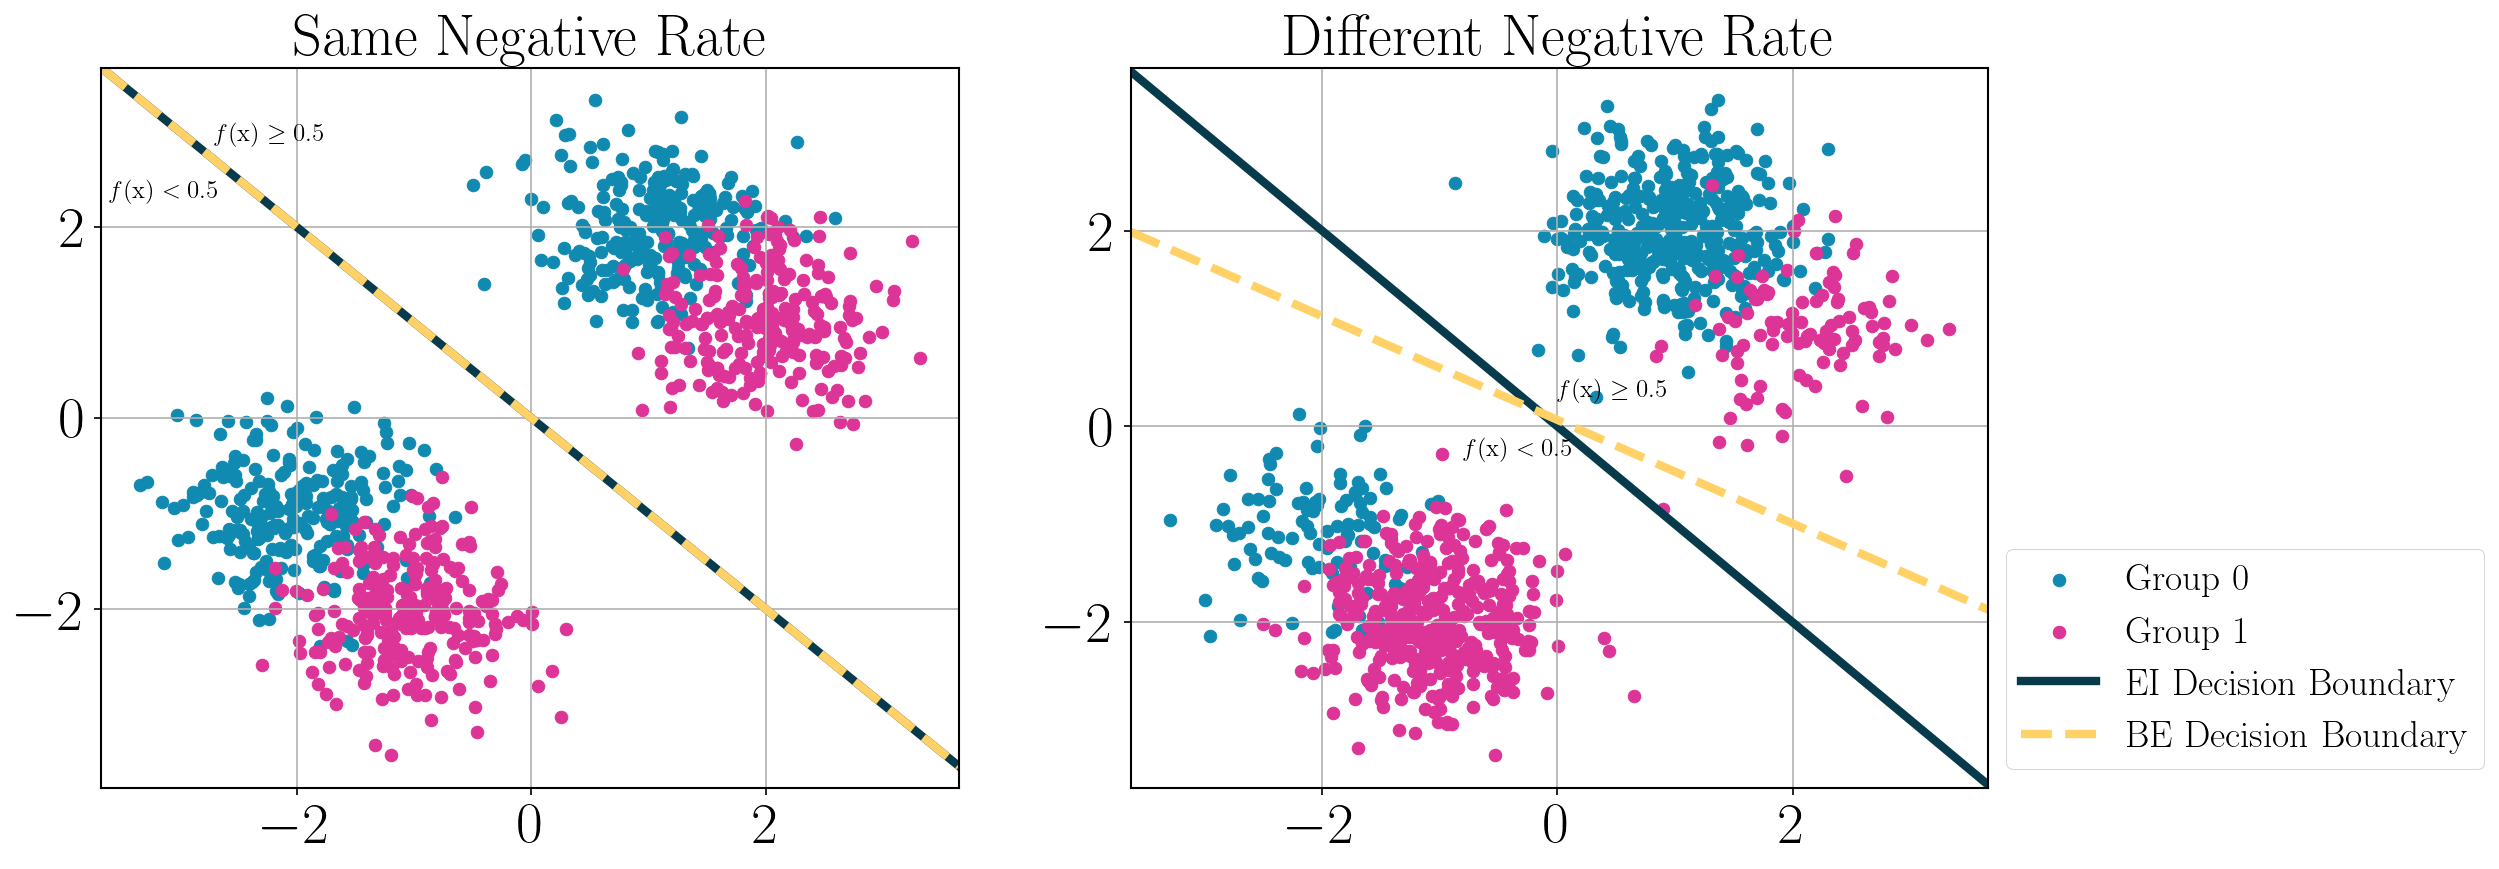

In [7]:
np.random.seed(0)
data = create_data(p_yz, mu_yz, sigma_yz, 0.2, 0)
data_d = create_data(p_yz_d, mu_yz, sigma_yz, 0.2, 0)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines

width = 17
height = 6

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', titlesize=28)
plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=1, ncols=2) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
#fig.subplots_adjust(left=0.06, bottom=.19, right=0.99, top=0.95, wspace=0.01) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure
fig.set_dpi(150)

colors = ['#073B4C','#118AB2','#DD3497','#FFD166']
data['both_group'] = np.concatenate((data['traingrp'], data['testgrp']), axis=0)
t1 = ax[0].scatter(data['both'][data['both_group']==-1,0],data['both'][data['both_group']==-1,1],c=colors[1],label='Group 0')
t2 = ax[0].scatter(data['both'][data['both_group']==1,0],data['both'][data['both_group']==1,1],c=colors[2],label='Group 1')
slope = -np.sin(res_cons_ei.x[0])/np.cos(res_cons_ei.x[0])
intercept = res_cons_ei.x[1]/np.cos(res_cons_ei.x[0])
ax[0].axline((0,intercept), slope=slope, color=colors[0], label='EI Decision Boundary',linewidth=4)
slope = -np.sin(res_cons_be.x[0])/np.cos(res_cons_be.x[0])
intercept = res_cons_be.x[1]/np.cos(res_cons_be.x[0])
ax[0].axline((0,intercept), slope=slope, color=colors[3], label='BE Decision Boundary',linewidth=4,linestyle='--')
ax[0].text(-3.6, 2.3, '$f(\mathrm{x})<0.5$', fontsize = 12)
ax[0].text(-2.7, 2.9, '$f(\mathrm{x})\geq 0.5$', fontsize = 12)
ax[0].set_title(r'Same Negative Rate')
ax[0].grid()

data_d['both_group'] = np.concatenate((data_d['traingrp'], data_d['testgrp']), axis=0)
t1 = ax[1].scatter(data_d['both'][data_d['both_group']==-1,0],data_d['both'][data_d['both_group']==-1,1],c=colors[1],label='Group 0')
t2 = ax[1].scatter(data_d['both'][data_d['both_group']==1,0],data_d['both'][data_d['both_group']==1,1],c=colors[2],label='Group 1')
slope = -np.sin(res_cons_ei_d.x[0])/np.cos(res_cons_ei_d.x[0])
intercept = res_cons_ei_d.x[1]/np.cos(res_cons_ei_d.x[0])
ax[1].axline((0,intercept), slope=slope, color=colors[0], label='EI Decision Boundary',linewidth=4)
slope = -np.sin(res_cons_be_d.x[0])/np.cos(res_cons_be_d.x[0])
intercept = res_cons_be_d.x[1]/np.cos(res_cons_be_d.x[0])
ax[1].axline((0,intercept), slope=slope, color=colors[3], label='BE Decision Boundary',linewidth=4, linestyle='--')
ax[1].text(-0.8, -0.3, '$f(\mathrm{x})<0.5$', fontsize = 12)
ax[1].text(0, 0.3, '$f(\mathrm{x})\geq 0.5$', fontsize = 12, weight='bold')
ax[1].set_title(r'Different Negative Rate')
ax[1].grid()

plt.legend(loc= 'lower right', bbox_to_anchor=(1.6, 0))
plt.gcf().set_dpi(150)
plt.subplots_adjust(top=0.9,bottom=0.1,left=0.06,right=0.8)
# plt.savefig('results/BE_NR_opt.pdf')
plt.show()
